In [199]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss, classification_report

import matplotlib.pyplot as plt


In [200]:


from sklearn.preprocessing import  OneHotEncoder

import random
np.random.seed(42)
random.seed(42)

# Load the dataset
df = pd.read_csv("animal_dataset.csv")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Get features and target from the dataset
X = df[['Weight', 'Height']].values
y = df['Animal'].values
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
label_names = label_encoder.classes_

# One-hot encode labels
onehot_encoder = OneHotEncoder(sparse_output=False)
Y = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))


In [201]:
pd.DataFrame(X).head()

,0,1
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


In [202]:
class NeuralNetwork:
    def __init__(self):
        inputLayerNeurons = 2
        hidden1 = 20
        hidden2 = 15
        hidden3 = 10
        outputLayerNeurons = 4

        self.learning_rate = 0.001
        self.W_H1 = np.random.randn(inputLayerNeurons, hidden1)
        self.W_H2 = np.random.randn(hidden1, hidden2)
        self.W_H3 = np.random.randn(hidden2, hidden3)
        self.W_O = np.random.randn(hidden3, outputLayerNeurons)

    def sigmoid(self, x, der=False):
        x = np.clip(x, -500, 500)  # prevent overflow
        s = 1 / (1 + np.exp(-x))
        return s * (1 - s) if der else s

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        self.hidden_input1 = np.dot(X, self.W_H1)
        self.hidden_output1 = self.sigmoid(self.hidden_input1)

        self.hidden_input2 = np.dot(self.hidden_output1, self.W_H2)
        self.hidden_output2 = self.sigmoid(self.hidden_input2)

        self.hidden_input3 = np.dot(self.hidden_output2, self.W_H3)
        self.hidden_output3 = self.sigmoid(self.hidden_input3)

        self.output_input = np.dot(self.hidden_output3, self.W_O)
        pred = self.softmax(self.output_input)

        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error

        hidden_error3 = output_delta.dot(self.W_O.T)
        hidden_delta3 = self.learning_rate * hidden_error3 * self.sigmoid(self.hidden_output3, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output1, der=True)

        self.W_O += self.hidden_output3.T.dot(output_delta)
        self.W_H3 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_H2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_H1 += X.T.dot(hidden_delta1)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)


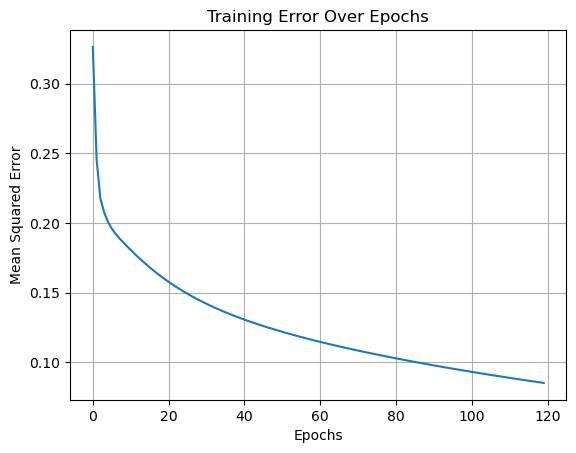

In [203]:
NN = NeuralNetwork()
err = []

for i in range(120):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)
plt.title("Training Error Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


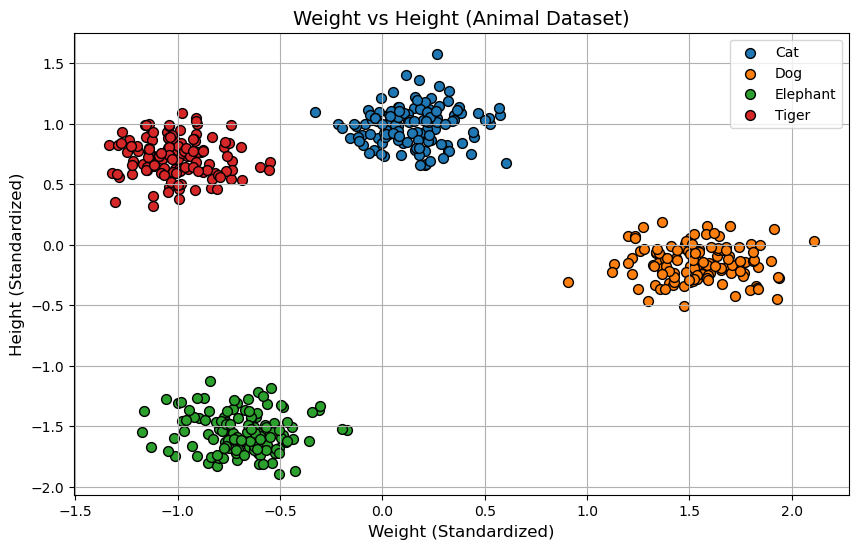

In [204]:

from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("animal_dataset.csv")
X = df[["Weight", "Height"]].values
y = df["Animal"].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
class_list = ['Cat', 'Dog', 'Elephant', 'Tiger']
label_map = {cls: idx for idx, cls in enumerate(class_list)}
y_encoded = np.array([label_map[label] for label in y])

# Create plot DataFrame
plot_df = pd.DataFrame(X_scaled, columns=["Weight", "Height"])
plot_df["Animal"] = y
plot_df["Label"] = y_encoded

# Plot
plt.figure(figsize=(10, 6))

for cls in class_list:
    class_points = plot_df[plot_df["Animal"] == cls]
    plt.scatter(
        class_points["Weight"],
        class_points["Height"],
        label=cls,
        s=50,
        edgecolor='k'
    )

plt.title("Weight vs Height (Animal Dataset)", fontsize=14)
plt.xlabel("Weight (Standardized)", fontsize=12)
plt.ylabel("Height (Standardized)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

y_pred_probs = NN.feedForward(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred_labels == y_true_labels)
print(f"Test Accuracy: {accuracy:.2%}")

# Step 8: Classification Report
print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=label_names))

Test Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00        21
         Dog       1.00      1.00      1.00        24
    Elephant       1.00      1.00      1.00        23
       Tiger       1.00      1.00      1.00        32

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

